In [2]:
# As usual, a bit of setup
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import timeit
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
  

In [11]:
from tqdm import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import timeit
import os

from smilebot import augmentations, features
from csvdb import truths

np.random.seed(410)

t = truths.Truths('datasets/ground_truths.csv')
a = augmentations.Augmentations('datasets/augmentations.csv', t, equalize_method='crop', choice="weak")

def feature_filter(source, row):
    #if '/jacfee/' not in row['source']: return False;
    return row['smile'] >= 0 and not row.get('invalid', False)
p = features.Provider(t, a, norm_shape=(224, 224), truths_filter=feature_filter)

#X_train, y_train, X_val, y_val = p.train_test(train_percent=0.6,
#        num_augmentations=10, shuffle=False, howmany=100)


Load the pickled validation set and its images

100%|██████████| 177/177 [00:00<00:00, 1112.97it/s]

Loading 177 images (balanced)...


Row
datasets/FEC_dataset/download/farm4.staticflickr.com/3674/12112214263_02958434b7_b.jpg
datasets/FEC_dataset/download/farm4.staticflickr.com/3924/14486765472_cd01556813_b.jpg
datasets/FEC_dataset/download/farm7.staticflickr.com/6099/6339613982_fc5f8e718b_b.jpg
datasets/FEC_dataset/download/farm9.staticflickr.com/8073/8303823827_0c56591ebb_b.jpg
Row
datasets/FEC_dataset/download/farm3.staticflickr.com/2810/12670085474_ba9532499f_b.jpg
datasets/FEC_dataset/download/farm7.staticflickr.com/6057/6231525924_00c9340f56_b.jpg
datasets/FEC_dataset/download/farm6.staticflickr.com/5563/14938398047_f85d94fdfa_b.jpg
datasets/FEC_dataset/download/farm2.staticflickr.com/1399/817302932_a6719587a1_b.jpg
Row
datasets/FEC_dataset/download/farm6.staticflickr.com/5495/9479564282_1b689d7573_b.jpg
datasets/FEC_dataset/download/farm3.staticflickr.com/2928/14280799711_0f34d97566_b.jpg
datasets/FEC_dataset/download/farm5.staticflickr.com/4036/4718219804_7c0d3ea273_b.jpg
datasets/FEC_dataset/download/farm8.st

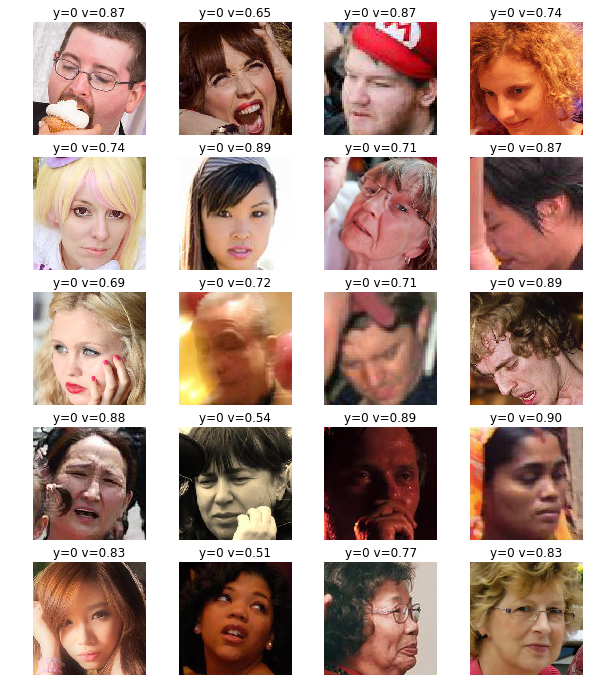

In [44]:
#saved_things = pickle.load(open("valsets/experiment-20190530-205616.pickle", "rb"))
#saved_things = pickle.load(open("patient_valsets/experiment-20190601-124238.pickle", "rb"))
saved_things = pickle.load(open("valsets/one_out_of_6_layers-sm-2-ffc-2d0.5-xl:3c4c-20190603-024652.pickle", "rb"))
exs = [ex for ex in saved_things['val_examples'] if ex['y'] == 0 and ex['yp'] == 1]
saved_keys = [ex['source'] for ex in exs]
manual_saved_keys = [
    "datasets/FEC_dataset/download/farm3.staticflickr.com/2718/13093542785_0a41e40af0_b.jpg",
    "datasets/FEC_dataset/download/farm4.staticflickr.com/3122/3085922376_02f4c8c156_b.jpg",
    "datasets/FEC_dataset/download/farm4.staticflickr.com/3051/2677798216_b8ca761f39_b.jpg",
    "datasets/FEC_dataset/download/farm8.staticflickr.com/7362/10855891115_fde6b6c853_b.jpg",
    "datasets/FEC_dataset/download/farm7.staticflickr.com/6108/6876837580_7cc716c0bf_b.jpg",
    "datasets/FEC_dataset/download/farm8.staticflickr.com/7210/6957233261_0aa324050e_b.jpg",
    "datasets/FEC_dataset/download/farm6.staticflickr.com/5584/14516851598_47f2438d76_b.jpg",
]
imgs, features, provs = p.from_keys(saved_keys, equalize=False)

from PIL import Image

def imshow_no_ax(img, title="", normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    if title != "": plt.title(title)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

fig=plt.figure(figsize=(10, 12))
columns = 4
rows = 5
SHIFT=60
#pick = [42, 46, 53, 76]
pick=[]
for i in range(1, columns*rows +1):
    if i > len(imgs): break
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    ix = -1 + i + SHIFT
    if i-1 < len(pick):
        ix = pick[i-1]
    if (i-1) % columns == 0: print("Row")
    print(exs[ix]['source'])
    show_im = imgs[ix]
    imshow_no_ax(show_im, "y={} v={:.2f}".format(features[ix]['smile'], exs[ix]['pred'].numpy()[1]), normalize=True)